# Positional Embeddings (Sinusoidal) — Visualization

This notebook visualizes the classic sinusoidal positional encoding introduced in "Attention Is All You Need".

It generates:
- Heatmap of the positional encoding matrix (positions × embedding dimensions)
- Line plots of several embedding dimensions across positions to show the varying frequencies


In [ ]:
from __future__ import annotations

import math
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", style="whitegrid")


def sinusoidal_positional_encoding(max_len: int, d_model: int) -> np.ndarray:
    """
    Create sinusoidal positional encodings as in Vaswani et al. (2017).

    Args:
        max_len: Maximum sequence length (number of positions).
        d_model: Embedding dimensionality.

    Returns:
        A NumPy array of shape (max_len, d_model).
    """
    position = np.arange(max_len)[:, np.newaxis]  # (max_len, 1)
    div_term = np.exp(
        np.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
    )  # (d_model/2,)

    pe = np.zeros((max_len, d_model), dtype=np.float32)
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return pe


def plot_heatmap(pe: np.ndarray, step: int = 1) -> None:
    """Plot a heatmap of the positional encoding matrix.

    Args:
        pe: Array of shape (max_len, d_model).
        step: Subsampling step for positions to make plots faster if needed.
    """
    sampled = pe[::step]
    plt.figure(figsize=(10, 5))
    sns.heatmap(sampled, cmap="magma", cbar=True)
    plt.xlabel("Embedding dimension")
    plt.ylabel("Position")
    plt.title("Sinusoidal Positional Encoding — Heatmap")
    plt.tight_layout()
    plt.show()


def plot_sample_dimensions(pe: np.ndarray, dims: Tuple[int, ...] = (0, 1, 2, 3, 8, 9)) -> None:
    """Plot selected embedding dimensions across positions.

    Args:
        pe: Array of shape (max_len, d_model).
        dims: Indices of embedding dimensions to plot.
    """
    positions = np.arange(pe.shape[0])
    plt.figure(figsize=(10, 5))
    for d in dims:
        plt.plot(positions, pe[:, d], label=f"dim {d}")
    plt.xlabel("Position")
    plt.ylabel("Value")
    plt.title("Selected Positional Encoding Dimensions vs Position")
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()



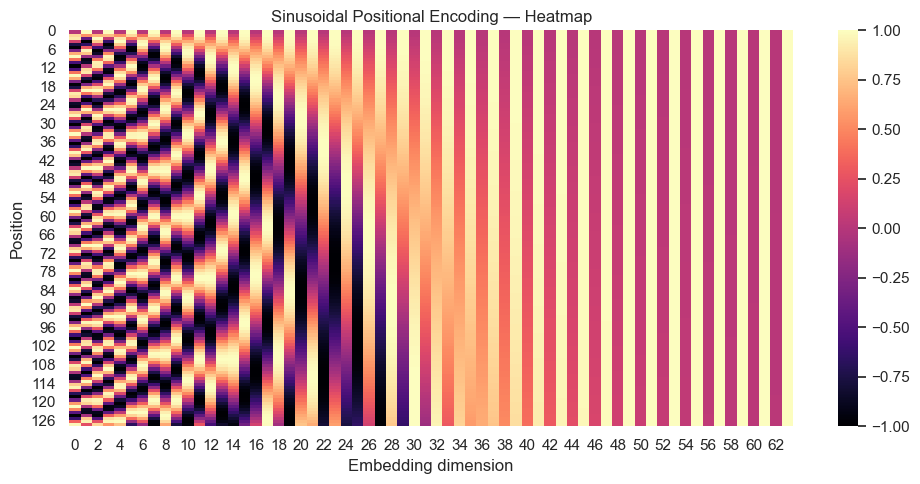

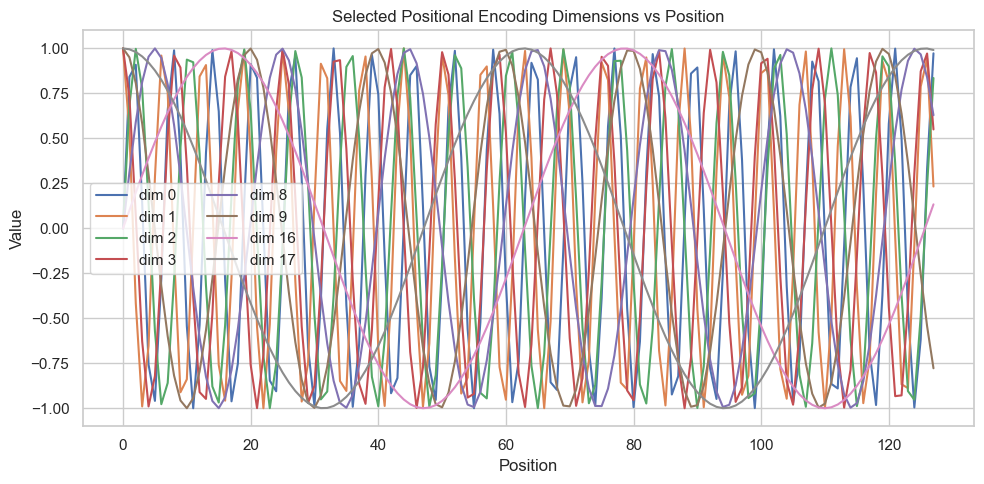

In [ ]:
# Parameters
MAX_LEN = 128
D_MODEL = 64

# Compute encodings
pe = sinusoidal_positional_encoding(MAX_LEN, D_MODEL)

# Visualizations
plot_heatmap(pe, step=1)
plot_sample_dimensions(pe, dims=(0, 1, 2, 3, 8, 9, 16, 17))
